<a href="https://colab.research.google.com/github/Athang9/GIS/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Area of Intrest**:
##Analyzing effects of Crime Rate, Literacy Rate, Income Rate on Public Safety

# **Goal**
I am planning to focusing on my research around Public Safety. I feel this aspect is much important and needs to be consider while traveling or living in a particular locality. I’m interested and curious to know how employement, income tax, active business locations, literacy, drug uses etc has affect on Public Safety (mostly security).

#**Dataset Links**

These data are in pdf format. I have converted PDF into Excel file using Python code.


###1. New Jersey Shapefile: https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

###2. New Jersey Crime Rate: https://nj.gov/njsp/ucr/uniform-crime-reports.shtml

###3. New Jersey Income Tax Collection: https://www.state.nj.us/treasury/taxation/soiintro.shtml


#**Below code belongs to the Problem Statement 0**

##Importing modules

In [56]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

##Importing map module for plotting map

In [57]:
!pip install mapclassify
import mapclassify

How to find dataset effectively: say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

##Importing shapefile from github and assigning to a variable

In [58]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O bounds_nj_shp.zip https://github.com/Athang9/GIS/raw/main/bounds_nj_shp.zip

zip_ref = zipfile.ZipFile('bounds_nj_shp.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njc=gpd.read_file('bounds_nj_shp.zip') #load the shapefile with gpd as njC

##Printing first 2 data from dataset

In [4]:
njc.head(2)

COUNTY       COUNTY_LAB   CO           GNIS_NAME    GNIS FIPSSTCO FIPSCO  \
0  ATLANTIC  Atlantic County  ATL  County of Atlantic  882270    34001      1   
1    BERGEN    Bergen County  BER    County of Bergen  882271    34003      3   

           ACRES    SQ_MILES  POP2010  ...  POP1990  POP1980  POPDEN2010  \
0  390815.404215  610.649069   274549  ...   275372   204615         450   
1  153490.275182  239.828555   905116  ...   829592   849843        3774   

   POPDEN2000  POPDEN1990  POPDEN1980        REGION     Shape_Leng  \
0         414         451         335       COASTAL  650228.153906   
1        3686        3459        3544  NORTHEASTERN  443326.122021   

     Shape_Area                                           geometry  
0  1.702385e+10  POLYGON ((443056.010 311529.770, 443068.440 31...  
1  6.686010e+09  POLYGON ((656200.963 783614.366, 656141.127 78...  

[2 rows x 21 columns]

In [5]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

##Plotting map using a shapefile

<Axes: >

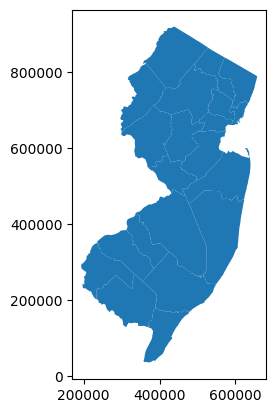

In [6]:
#make the map
njc.plot()  #plot function will help to plot the map of new jersey

#Plotting Population of New Jersey

<Axes: >

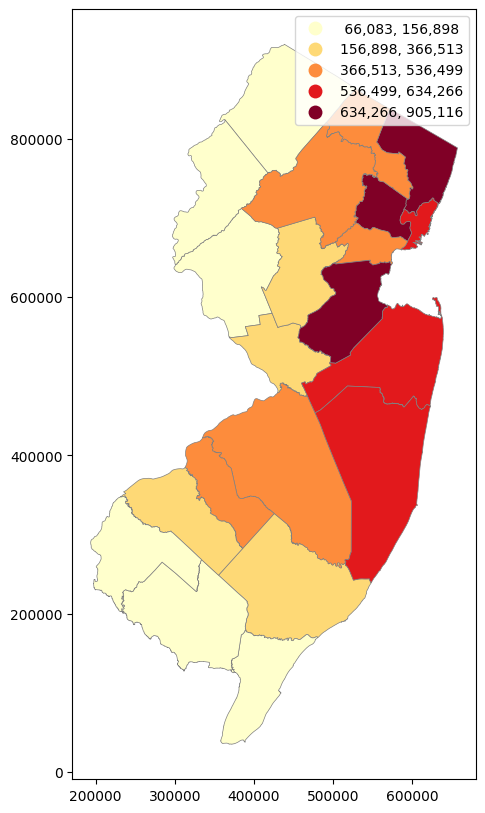

In [7]:
njc.plot(figsize=(8,10),column='POP2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})

#Checking variables inside dataset

In [8]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

##Checking directories

In [9]:
!ls

bounds_nj_shp.zip     nj_counties.shp.xml  nj_munis.shp       nj_state.sbx
nj_counties.cpg       nj_counties.shx	   nj_munis.shp.xml   nj_state.shp
nj_counties.dbf       nj_munis.cpg	   nj_munis.shx       nj_state.shp.xml
nj_counties_fgdc.xml  nj_munis.dbf	   nj_state.cpg       nj_state.shx
nj_counties.prj       nj_munis_fgdc.xml    nj_state.dbf       sample_data
nj_counties.sbn       nj_munis.prj	   nj_state_fgdc.xml
nj_counties.sbx       nj_munis.sbn	   nj_state.prj
nj_counties.shp       nj_munis.sbx	   nj_state.sbn


##Checking data distribution

In [10]:
njc.describe()

ACRES    SQ_MILES        POP2010        POP2000        POP1990  \
count      21.000000   21.000000      21.000000      21.000000      21.000000   
mean   236668.445624  369.794446  418661.619048  400683.333333  375651.619048   
std    129423.458908  202.224155  252391.802799  245685.165612  232024.704159   
min     32982.400794   51.535001   66083.000000   64285.000000   65294.000000   
25%    146431.864374  228.799788  156898.000000  146438.000000  138991.000000   
50%    215166.893094  336.198271  448734.000000  423394.000000  395066.000000   
75%    310834.264884  485.678539  576567.000000  522541.000000  532498.000000   
max    525002.683590  820.316693  905116.000000  884118.000000  829592.000000   

             POP1980    POPDEN2010    POPDEN2000    POPDEN1990    POPDEN1980  \
count      21.000000     21.000000     21.000000     21.000000     21.000000   
mean   356042.238095   2089.095238   2020.476190   1883.142857   1866.952381   
std    241526.155270   2857.463699   2774.989597   2548.549632   2651.426455   
min     64676.000000    190.000000    185.000000    188.000000    186.000000   
25%    132866.000000    340.000000    358.000000    332.000000    288.000000   
50%    356502.000000   1023.000000    976.000000    788.000000    666.000000   
75%    504094.000000   2527.000000   2367.000000   2284.000000   2073.000000   
max    850451.000000  12309.000000  11817.000000  10733.000000  10808.000000   

          Shape_Leng    Shape_Area  
count      21.000000  2.100000e+01  
mean   559159.328973  1.030924e+10  
std    133171.141166  5.637663e+09  
min    321814.398490  1.436708e+09  
25%    492851.319687  6.378546e+09  
50%    541587.507240  9.372632e+09  
75%    664545.338596  1.353989e+10  
max    788906.717476  2.286903e+10

# **Below code belongs to Problem Statement 1**

In [11]:
!pip install mapclassify
import mapclassify

mapping from gis datafile - if youre lucky, you'll get data from
shapefile for creating own shapefile you can use quamtum shapefile which can use to draw any shape and to get satellite image you can use google  maps export data as xml file and load it into python we will now plot data which is inside the shapefile

In [12]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

<Axes: >

[]

[]

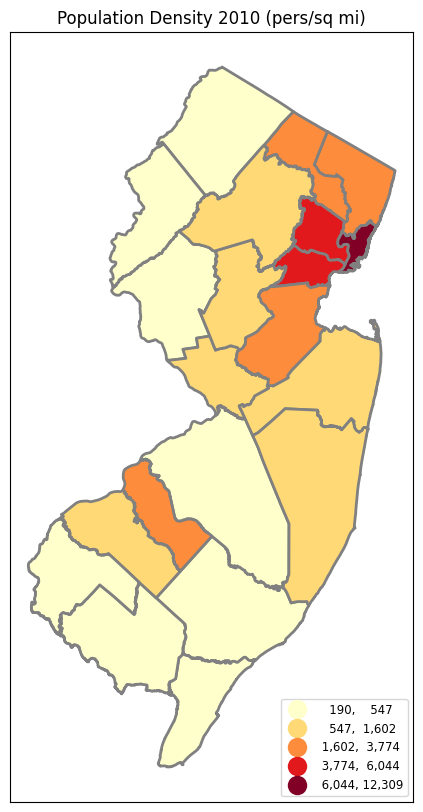

In [13]:
fig, ax = plt.subplots(1, figsize=(6,10))
njc.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([])
ax.set_yticks([])

#1st Merge(Income Tax Data)

In [14]:
tax_df=pd.read_excel('https://github.com/Athang9/GIS/raw/main/TotIncTaxCounty%20(1)%20(1).xlsx')

In [15]:
tax_df.head()

COUNTY   CODE  TOTAL_STATE_FEE  TOTAL_MUNI_TAX  TOTAL_STATE/MUNI
0    ATLANTIC      1        740146.25       209485.40         949631.65
1      BERGEN      2       1417081.07       849275.20        2266356.27
2  BURLINGTON      3        597149.02       355146.72         952295.74
3      CAMDEN      4        297085.46       164325.99         461411.45
4    CAPE MAY      5       2618516.90       679300.15        3297817.05

In [16]:
tax_df.dtypes
tax_df.head()

COUNTY               object
CODE                  int64
TOTAL_STATE_FEE     float64
TOTAL_MUNI_TAX      float64
TOTAL_STATE/MUNI    float64
dtype: object

COUNTY   CODE  TOTAL_STATE_FEE  TOTAL_MUNI_TAX  TOTAL_STATE/MUNI
0    ATLANTIC      1        740146.25       209485.40         949631.65
1      BERGEN      2       1417081.07       849275.20        2266356.27
2  BURLINGTON      3        597149.02       355146.72         952295.74
3      CAMDEN      4        297085.46       164325.99         461411.45
4    CAPE MAY      5       2618516.90       679300.15        3297817.05

Removing Trailing space from column name and all the rows

In [17]:
tax_df["COUNTY"] = tax_df["COUNTY "].str.strip()
tax_df.head(2)

COUNTY   CODE  TOTAL_STATE_FEE  TOTAL_MUNI_TAX  TOTAL_STATE/MUNI  \
0  ATLANTIC      1        740146.25        209485.4         949631.65   
1    BERGEN      2       1417081.07        849275.2        2266356.27   

     COUNTY  
0  ATLANTIC  
1    BERGEN

In [59]:
njc01=njc[['COUNTY','geometry','POP2010']]
njc01.head(2)
tax_df.head(2)

COUNTY                                           geometry  POP2010
0  ATLANTIC  POLYGON ((443056.010 311529.770, 443068.440 31...   274549
1    BERGEN  POLYGON ((656200.963 783614.366, 656141.127 78...   905116

COUNTY   CODE  TOTAL_STATE_FEE  TOTAL_MUNI_TAX  TOTAL_STATE/MUNI  \
0  ATLANTIC      1        740146.25        209485.4         949631.65   
1    BERGEN      2       1417081.07        849275.2        2266356.27   

     COUNTY  
0  ATLANTIC  
1    BERGEN

In [60]:
njc1 = pd.merge(njc01, tax_df, on='COUNTY',how='outer',indicator=True)
njc1[['COUNTY','TOTAL_STATE/MUNI','POP2010','_merge']]
njc2 = pd.merge(njc01,tax_df, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

COUNTY  TOTAL_STATE/MUNI  POP2010 _merge
0     ATLANTIC         949631.65   274549   both
1       BERGEN        2266356.27   905116   both
2   BURLINGTON         952295.74   448734   both
3       CAMDEN         461411.45   513657   both
4     CAPE MAY        3297817.05    97265   both
5   CUMBERLAND         175799.57   156898   both
6        ESSEX         762032.87   783969   both
7   GLOUCESTER         331209.33   288288   both
8       HUDSON        1364629.18   634266   both
9    HUNTERDON         199464.78   128349   both
10      MERCER         764378.82   366513   both
11    MONMOUTH        1573526.87   630380   both
12       OCEAN         983963.90   576567   both
13     PASSAIC         349462.51   501226   both
14       SALEM          69471.35    66083   both
15    SOMERSET         981079.02   323444   both
16      SUSSEX         341189.19   149265   both
17       UNION         607355.12   536499   both
18      WARREN          19260.35   108692   both
19      MORRIS        1571357.36   492276   both
20   MIDDLESEX        2227246.95   809858   both

In [22]:
if 'COUNTY' in njc01.columns:
    print("The 'COUNTY' column exists in njc01.")
else:
    print("The 'COUNTY' column does not exist in njc01.")

# Check if 'COUNTY' column exists in new_df
if 'COUNTY ' in tax_df.columns:
    print("The 'COUNTY' column exists in new_df.")
else:
    print("The 'COUNTY' column does not exist in new_df.")

# Print unique values in 'COUNTY' column in njc01 and new_df
print("Unique values in 'COUNTY' column in njc01:", njc01['COUNTY'].unique())
print("Unique values in 'COUNTY' column in new_df:", tax_df['COUNTY'].unique())

The 'COUNTY' column exists in njc01.
The 'COUNTY' column exists in new_df.
Unique values in 'COUNTY' column in njc01: ['ATLANTIC' 'BERGEN' 'BURLINGTON' 'CAMDEN' 'CAPE MAY' 'CUMBERLAND' 'ESSEX'
 'GLOUCESTER' 'HUDSON' 'HUNTERDON' 'MERCER' 'MONMOUTH' 'OCEAN' 'PASSAIC'
 'SALEM' 'SOMERSET' 'SUSSEX' 'UNION' 'WARREN' 'MORRIS' 'MIDDLESEX']
Unique values in 'COUNTY' column in new_df: ['ATLANTIC' 'BERGEN' 'BURLINGTON' 'CAMDEN' 'CAPE MAY' 'CUMBERLAND' 'ESSEX'
 'GLOUCESTER' 'HUDSON' 'HUNTERDON' 'MERCER' 'MIDDLESEX' 'MONMOUTH'
 'MORRIS' 'OCEAN' 'PASSAIC' 'SALEM' 'SOMERSET' 'SUSSEX' 'UNION' 'WARREN']


#2nd Merge (Crime Data)

In [23]:
from sqlalchemy import true
import pandas as pd
crime_df=pd.read_excel('https://github.com/Athang9/GIS/raw/main/TotalCrimeCounty.xlsx')
crime_df.dtypes
crime_df.head(2)

COUNTY         object
TOTAL_CRIME     int64
dtype: object

COUNTY  TOTAL_CRIME
0  Atlantic County         5719
1    Bergen County         7694

In [24]:
crime_df2 = crime_df[['COUNTY']]
crime_df2= crime_df['COUNTY'].str.upper()
crime_df2 = crime_df2.str.replace(" COUNTY", "")
crime_df4 = crime_df[["TOTAL_CRIME"]]
crime_df2 = pd.concat ([crime_df2,crime_df4], axis=1)
crime_df2.head(3)

COUNTY  TOTAL_CRIME
0    ATLANTIC         5719
1      BERGEN         7694
2  BURLINGTON         5184

In [30]:
combined_column = pd.concat([njc['POP2010'], crime_df['TOTAL_CRIME']], axis=0)
combined_column.head(2)

0    274549
1    905116
dtype: int64

In [31]:
njc3 = pd.merge(njc, crime_df2, on='COUNTY',how='outer',indicator=True)
njc3[['COUNTY','TOTAL_CRIME','geometry','POP2010','_merge']]
njc4 = pd.merge(njc,crime_df2, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

COUNTY  TOTAL_CRIME  \
0     ATLANTIC         5719   
1       BERGEN         7694   
2   BURLINGTON         5184   
3       CAMDEN        11545   
4     CAPE MAY         2010   
5   CUMBERLAND         3861   
6        ESSEX        13802   
7   GLOUCESTER         4188   
8       HUDSON        11165   
9    HUNTERDON          501   
10      MERCER         6465   
11    MONMOUTH         8047   
12       OCEAN         5361   
13     PASSAIC         8180   
14       SALEM         1114   
15    SOMERSET         2680   
16      SUSSEX          574   
17       UNION         9224   
18      WARREN         1087   
19      MORRIS         3131   
20   MIDDLESEX         8862   

                                             geometry  POP2010 _merge  
0   POLYGON ((443056.010 311529.770, 443068.440 31...   274549   both  
1   POLYGON ((656200.963 783614.366, 656141.127 78...   905116   both  
2   POLYGON ((436626.690 491361.780, 436701.190 49...   448734   both  
3   POLYGON ((342763.990 423475.830, 342804.100 42...   513657   both  
4   POLYGON ((390389.730 177065.130, 390410.170 17...    97265   both  
5   POLYGON ((333743.882 268331.623, 341456.371 26...   156898   both  
6   POLYGON ((541167.940 755990.810, 541175.500 75...   783969   both  
7   POLYGON ((315566.250 382993.340, 315650.440 38...   288288   both  
8   MULTIPOLYGON (((586210.281 660143.720, 586222....   634266   both  
9   POLYGON ((391770.815 705704.676, 392388.938 70...   128349   both  
10  POLYGON ((430243.040 561670.400, 430241.770 56...   366513   both  
11  MULTIPOLYGON (((633923.765 579357.834, 633936....   630380   both  
12  POLYGON ((558823.650 485784.590, 558844.950 48...   576567   both  
13  POLYGON ((571665.371 838036.808, 564405.500 82...   501226   both  
14  POLYGON ((237257.740 347915.180, 237283.770 34...    66083   both  
15  POLYGON ((477019.000 700585.500, 477035.030 70...   323444   both  
16  POLYGON ((445227.700 915430.620, 449738.410 91...   149265   both  
17  POLYGON ((532362.499 692149.483, 532524.353 69...   536499   both  
18  POLYGON ((370994.194 814703.856, 374212.172 81...   108692   both  
19  POLYGON ((491990.770 820527.420, 492000.420 82...   492276   both  
20  POLYGON ((548930.697 641772.802, 550167.286 64...   809858   both

In [39]:
njc3["TOTAL_CRIME1"] = njc3["POP2010"]/njc3["TOTAL_CRIME"]
njc3.head(2)

COUNTY       COUNTY_LAB   CO           GNIS_NAME    GNIS FIPSSTCO FIPSCO  \
0  ATLANTIC  Atlantic County  ATL  County of Atlantic  882270    34001      1   
1    BERGEN    Bergen County  BER    County of Bergen  882271    34003      3   

           ACRES    SQ_MILES  POP2010  ...  POPDEN2000  POPDEN1990  \
0  390815.404215  610.649069   274549  ...         414         451   
1  153490.275182  239.828555   905116  ...        3686        3459   

   POPDEN1980        REGION     Shape_Leng    Shape_Area  \
0         335       COASTAL  650228.153906  1.702385e+10   
1        3544  NORTHEASTERN  443326.122021  6.686010e+09   

                                            geometry TOTAL_CRIME  _merge  \
0  POLYGON ((443056.010 311529.770, 443068.440 31...   48.006470    both   
1  POLYGON ((656200.963 783614.366, 656141.127 78...  117.639199    both   

   TOTAL_CRIME1  
0        5719.0  
1        7694.0  

[2 rows x 24 columns]

In [36]:
njc3['_merge'].value_counts()

both          21
left_only      0
right_only     0
Name: _merge, dtype: int64

#Mapping Total Income Tax

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://www.state.nj.us/treasury/taxation/soiintro.shtml ')

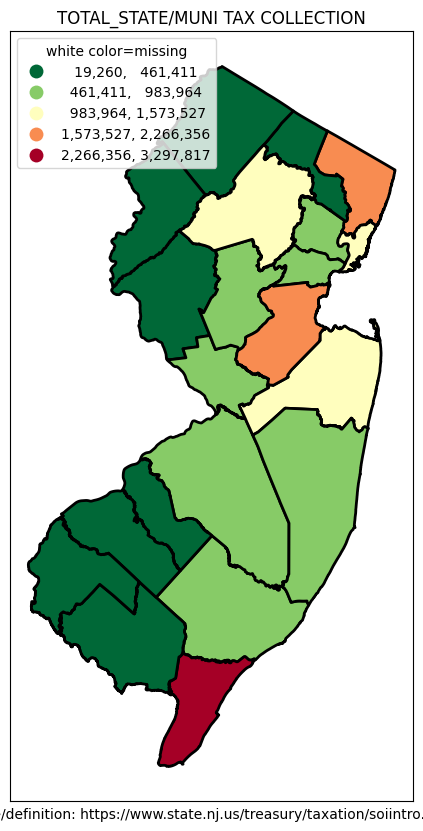

In [82]:
fig, ax = plt.subplots(1, figsize=(6, 10))
njc1.plot(ax=ax, column='TOTAL_STATE/MUNI', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper left', 'markerscale': 1})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("TOTAL_STATE/MUNI TAX COLLECTION")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: https://www.state.nj.us/treasury/taxation/soiintro.shtml ''')
plt.show()

I have gathered the data from the census in this case, and it is per capita, but I have just taken into account the total income tax that the entire county generated.

**Analysis:
Cape May generated the most income tax.
Bergen and Middlesex generated the second-highest amount of taxes.**

<Axes: >

Text(0.5, 1.0, 'Map of Tax Collection of New Jersey (Countywise)')

Text(0.5, 58.7222222222222, 'source/definition: https://www.state.nj.us/treasury/taxation/soiintro.shtml ')

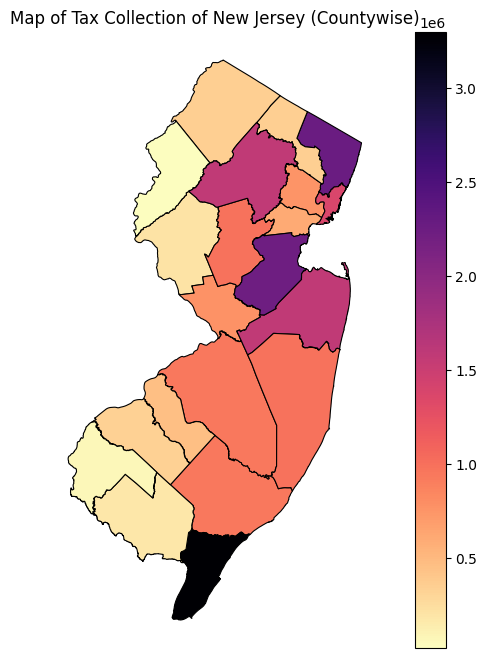

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njc2.plot(ax=ax,column = 'TOTAL_STATE/MUNI' ,cmap='magma_r', linewidth=0.8, edgecolor='black', legend=True) #RdBu,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Tax Collection of New Jersey (Countywise)')
ax.set_xlabel('''source/definition: https://www.state.nj.us/treasury/taxation/soiintro.shtml ''')
ax.set_axis_off()
plt.show()

Inference
Tax Collection of New Jersey State:


Below code will check whether there are any spaces left or not

#Mapping Total Crime

In [ ]:
# delete this
fig, ax = plt.subplots(1, figsize=(10,8))
njc3.plot(ax=ax, column='TOTAL_CRIME', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
ax.title.set_text("Total Crime of New Jersey")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: zillow.com/research/data''')
plt.show()

fig, ax = plt.subplots(1, figsize=(10,8))
njc3.plot(ax=ax, column='TOTAL_CRIME1', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
ax.title.set_text("Total Crime of New Jersey (Per Capita)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: zillow.com/research/data''')
plt.show()


In [ ]:
#delete this
fig, ax = plt.subplots(1, figsize=(10,8))
njc3.plot(ax=ax, column='TOTAL_CRIME1', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
ax.title.set_text("Total Crime of New Jersey (Per Capita)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: zillow.com/research/data''')
plt.show()


In [ ]:
#delete this
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njc3.plot(ax=ax,column = 'TOTAL_CRIME' ,cmap='PuBuGn', linewidth=0.8, edgecolor='black', legend=True) #gist_stern_r,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Crime Rate of New Jersey (Countywise)')
ax.set_axis_off()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njc3.plot(ax=ax,column = 'TOTAL_CRIME1' ,cmap='PuBuGn', linewidth=0.8, edgecolor='black', legend=True) #gist_stern_r,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Crime Rate of New Jersey (Countywise)')
ax.set_axis_off()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Total Crime of New Jersey')

[]

[]

Text(0.5, 58.7222222222222, ' https://nj.gov/njsp/ucr/uniform-crime-reports.shtml')

<Axes: >

Text(0.5, 1.0, 'Total Crime of New Jersey (Per Capita)')

[]

[]

Text(0.5, 58.7222222222222, ' https://nj.gov/njsp/ucr/uniform-crime-reports.shtml')

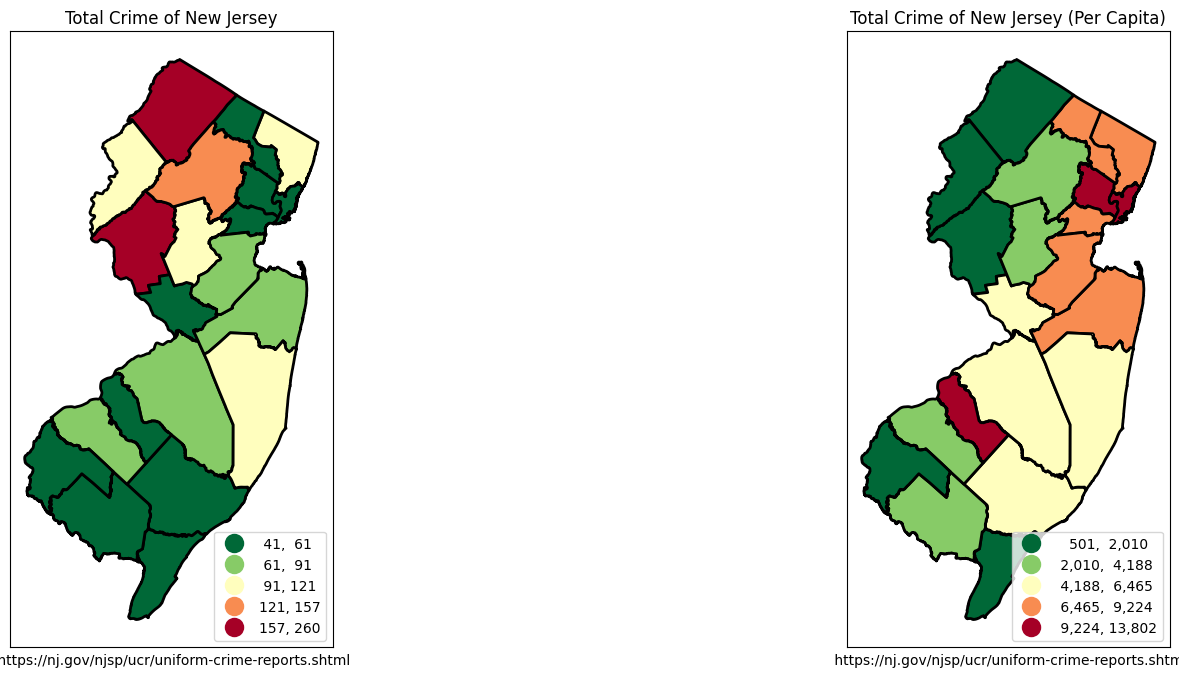

In [206]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side and some space between them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})

# Plot the first map on the left subplot (ax1)
njc3.plot(ax=ax1, column='TOTAL_CRIME', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax1.get_legend()
ax1.set_title("Total Crime of New Jersey")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel(''' https://nj.gov/njsp/ucr/uniform-crime-reports.shtml''')

# Plot the second map on the right subplot (ax2)
njc3.plot(ax=ax2, column='TOTAL_CRIME1', legend=True, cmap='RdYlGn_r',
          scheme='natural_breaks', k=5, edgecolor='black', linewidth=2,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg2 = ax2.get_legend()
ax2.set_title("Total Crime of New Jersey (Per Capita)")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel(''' https://nj.gov/njsp/ucr/uniform-crime-reports.shtml''')

# Show the figure with both maps side by side
plt.show()


I have gathered data from the Federal Bureau of Investigation, but it is not per capita, so I have divided it and made a new map, and the difference in the outcome is unexpected. Counties with higher crime rates are now included in counties with the lowest crime rates, and vice versa.

**Analysis:
The most violent areas are Camden, Essex, and Hudson.
The least violent cities include Cape May, Sussex, Warren, and Hunterdon Salem**

<Axes: >

Text(0.5, 1.0, 'Map of Crime Rate of New Jersey (Countywise)')

<Axes: >

Text(0.5, 1.0, 'Map of Crime Rate Per Capita of New Jersey (Countywise)')

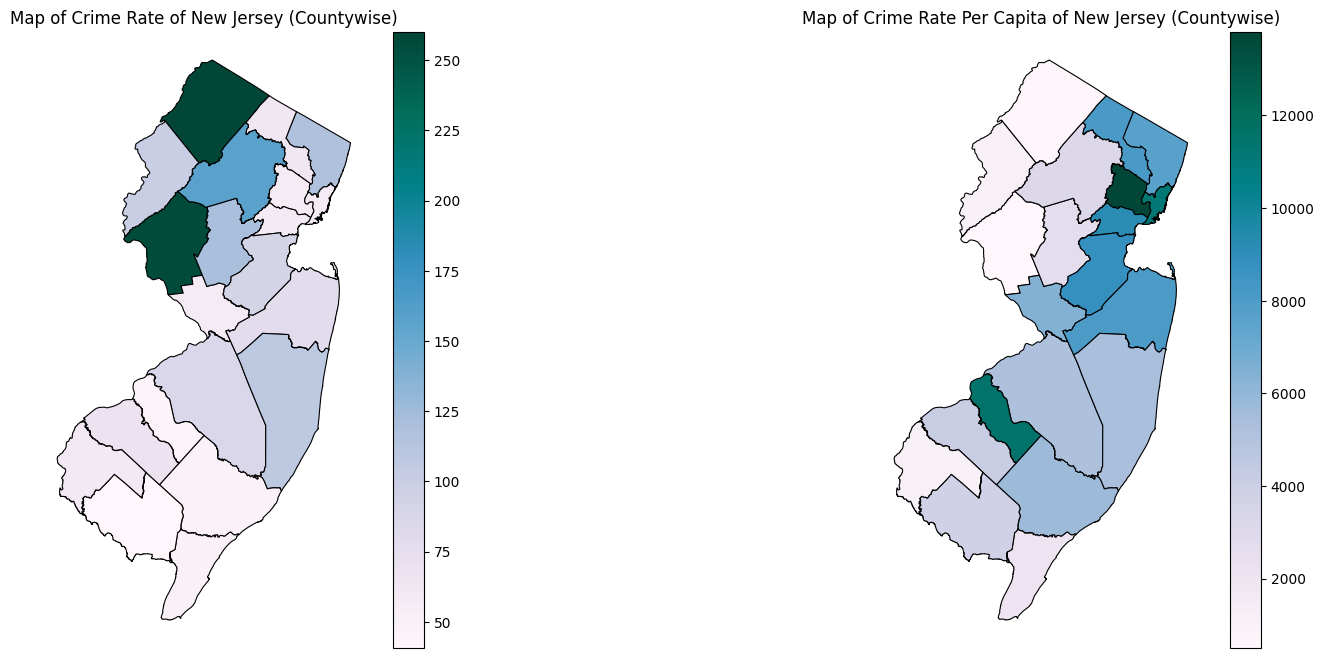

In [130]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side and some space between them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.5})

# Plot the first map on the left subplot (ax1)
njc3.plot(ax=ax1, column='TOTAL_CRIME', cmap='PuBuGn', linewidth=0.8, edgecolor='black', legend=True)
ax1.set_title('Map of Crime Rate of New Jersey (Countywise)')
ax1.set_axis_off()

# Plot the second map on the right subplot (ax2)
njc3.plot(ax=ax2, column='TOTAL_CRIME1', cmap='PuBuGn', linewidth=0.8, edgecolor='black', legend=True)
ax2.set_title('Map of Crime Rate Per Capita of New Jersey (Countywise)')
ax2.set_axis_off()

# Show the figure with both maps side by side
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
njc3.plot(ax=ax,column = 'TOTAL_CRIME1' ,cmap='PuBuGn', linewidth=0.8, edgecolor='black', legend=True) #gist_stern_r,Set3,Dark2,tab20,Paired,Accent,PuOr,Set2,Pastel2,YlOrBr,PuBuGn,Blues_r,Greens,jet,cividis,spectral,viridis,inferno,plasma,coolwarm
ax.set_title(f'Map of Crime Rate of New Jersey (Countywise)')
ax.set_axis_off()
plt.show()

#**Inference**

In [187]:
njc3c = njc3.copy()

njc3c["geometry"] = njc3c["geometry"].centroid

In [194]:
njc_cam_cum=njc.query("COUNTY=='CAMDEN'")

<Axes: >

<Axes: >

[]

[]

<Axes: title={'center': 'Income Tax / Crime Rate Relation (Camden)'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

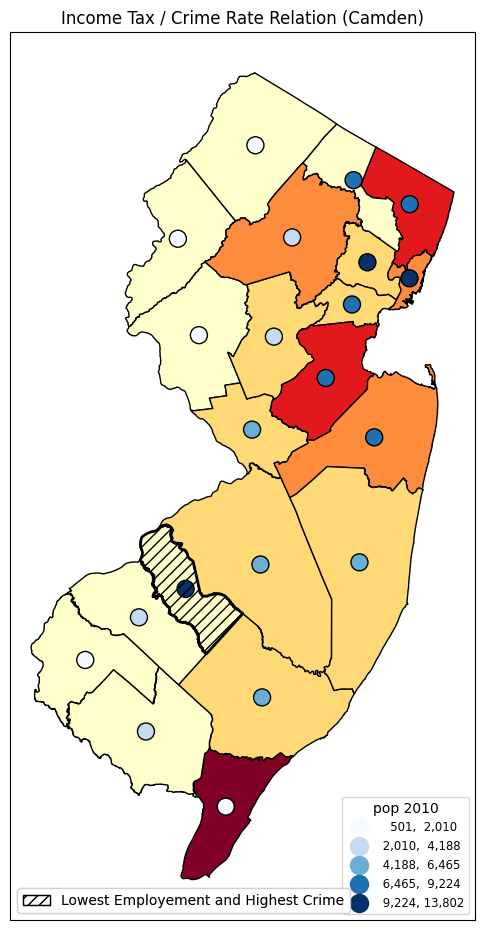

In [204]:
fig, ax = plt.subplots(1, figsize=(6,14))
njc1.plot(ax=ax,column='TOTAL_STATE/MUNI',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Income Tax''')

njc3c.plot(ax=ax,column='TOTAL_CRIME1',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)


ax.title.set_text("Income Tax / Crime Rate Relation (Camden)")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Crime Rate''')

njc_cam_cum.plot(ax=ax,edgecolor='black',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''pop 2010''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='black', facecolor='none',
                     hatch='///', label=r'Lowest Employement and Highest Crime')

l2=plt.legend(handles=[bluePatch],loc='lower left')


ax.add_artist(l2)
ax.add_artist(l1)

**Analysis: Camden County has a high crime rate because it collects the least income tax revenue and hence has the lowest employment.**


<Axes: >

<Axes: >

[]

[]

Text(400000, 925000, 'High Income then also High Crime Rate')

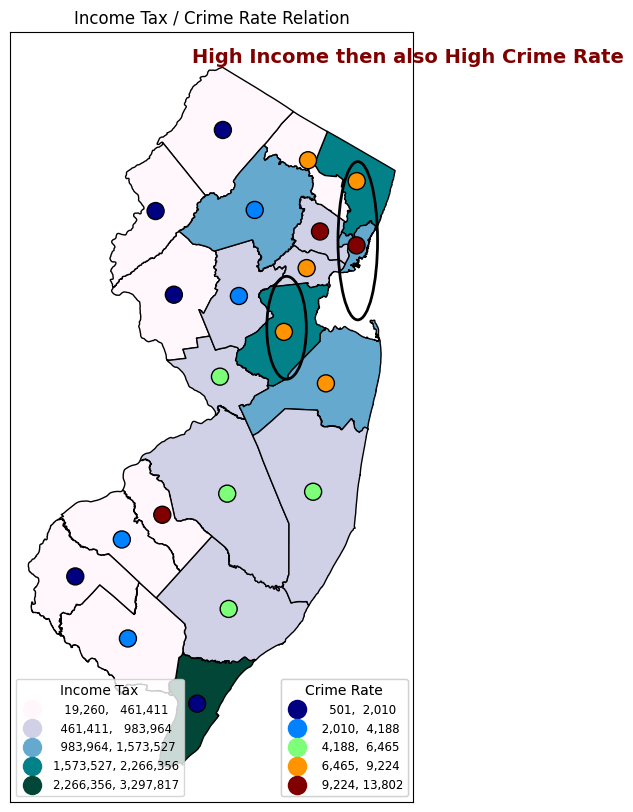

In [205]:
fig, ax = plt.subplots(1, figsize=(6,10))
njc1.plot(ax=ax,column='TOTAL_STATE/MUNI',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Income Tax''')

njc3c.plot(ax=ax,column='TOTAL_CRIME1',legend=True,cmap='jet',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 150)

ax.title.set_text("Income Tax / Crime Rate Relation")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Crime Rate''')



ax.add_artist(l2)
ax.add_artist(l1)

ax.text(400000, 925000, r'High Income then also High Crime Rate', fontsize=14, color='maroon',fontweight='bold')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(610000, 700000), width=50000, height=200000, edgecolor='black', fc='None', lw=2)
e2 = Ellipse(xy=(520000, 590000), width=50000, height=130000, edgecolor='black', fc='None', lw=2)
ax.add_patch(e1)
ax.add_patch(e2)


However, three counties—Bergen, Hudson, and Middlesex—collect the second-highest income taxes, which indicates employment, and they also have the second-highest crime rates.